# aSPEM Experiment :defining a protocol




In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from  aSPEM import aSPEM
import time
timeStr = time.strftime("%Y-%m-%d_%H%M%S", time.localtime())
e = aSPEM(mode='psychophysique', observer = 'test', timeStr=timeStr)

In [2]:
print(e.print_protocol())

TODO


## installing dependencies

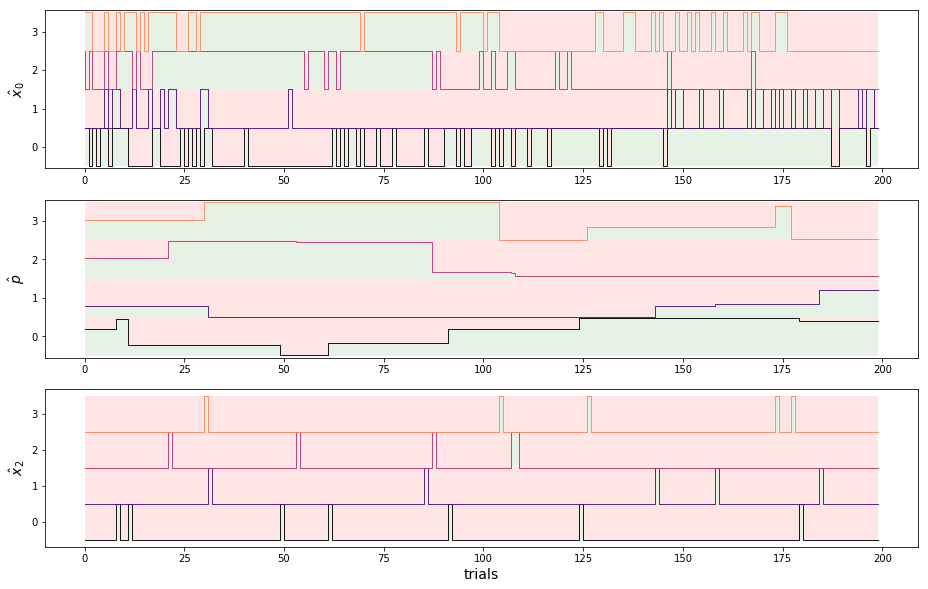

In [3]:
%matplotlib inline
fig_width = 12

fig, axs = e.plot(mode=None)

In [4]:
from scipy.stats import beta